In [2]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import train, to_tensor, plot
from Agent import DoubleDQN as Agent
import d2l.torch as d2l
import torch
import random
import numpy as np

In [3]:
def test(cfg, env, agent, interval_times, noise=False, state_noise=0):
    print("开始测试！")
    rewards = []  # 记录所有回合的奖励
    steps = []
    if noise:
        agent.policy_net.train()
    else:
        agent.policy_net.eval()
    for i_ep in range(cfg.test_eps):
        ep_reward = 0  # 记录一回合内的奖励
        ep_step = 0
        action = 0
        state = env.reset()  # 重置环境，返回初始状态
        for i in range(cfg.max_steps):
            ep_step+=1
            if i % interval_times == 0:
                next_state, reward, done, _ = env.step(env.action_space.sample())
            else:
                action = agent.predict_action(state)  # 选择动作
                next_state, reward, done, _ = env.step(action)  # 更新环境，返回transition
            state = next_state  # 更新下一个状态
            state = state + state_noise * np.random.normal(0, 0.5, env.observation_space.shape[0])
            ep_reward += reward  # 累加奖励
            if done:
                break
        steps.append(ep_step)
        rewards.append(ep_reward)
        print(f"回合：{i_ep+1}/{cfg.test_eps}，奖励：{ep_reward:.2f}")
    agent.policy_net.train()
    print("完成测试")
    env.close()
    return rewards

In [4]:
# 获取参数
cfg = Config() 
# 训练
env, agent = env_agent_config(cfg)
# agent = torch.load('./Data/LunarLander-v2-StateAttention-Noise/380-600.pt')
agent = torch.load('./Data/CartPole-v1_DDQN_None/01-200-200-200.pt')

状态空间维度：4，动作空间维度：2


/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


开始测试！
回合：1/20，奖励：200.00
回合：2/20，奖励：200.00
回合：3/20，奖励：200.00
回合：4/20，奖励：74.00
回合：5/20，奖励：197.00
回合：6/20，奖励：200.00
回合：7/20，奖励：116.00
回合：8/20，奖励：200.00
回合：9/20，奖励：200.00
回合：10/20，奖励：87.00
回合：11/20，奖励：76.00
回合：12/20，奖励：200.00
回合：13/20，奖励：200.00
回合：14/20，奖励：200.00
回合：15/20，奖励：200.00
回合：16/20，奖励：16.00
回合：17/20，奖励：200.00
回合：18/20，奖励：200.00
回合：19/20，奖励：200.00
回合：20/20，奖励：200.00
完成测试
168.3 56.94040744497707


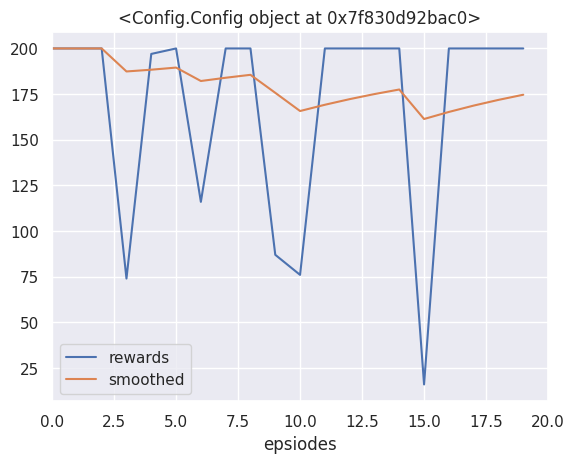

In [11]:
rewards = test(cfg, env, agent, interval_times=100, noise=False, state_noise=0.3)
plot_rewards(rewards, cfg)
arr = np.array(rewards)
print(arr.mean(), arr.std())

tensor([[[[1.0802e-05, 2.8930e-06, 7.4262e-07, 4.1262e-13, 3.5629e-06,
           1.2496e-01, 1.0533e-05, 1.0077e-05]]]])

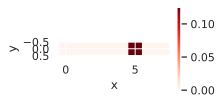

In [10]:
d2l.show_heatmaps(agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
agent.actor.atten.view(1, 1, 1, 8).cpu()